<a href="https://colab.research.google.com/github/RidhaLOUZE/CNN_Realand-fake-dataset/blob/main/CNN_model_2041_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-vggface
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python
!pip install --user tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ciplab/real-and-fake-face-detection
! mkdir 2041

Saving kaggle.json to kaggle.json
 99% 425M/431M [00:02<00:00, 165MB/s]
100% 431M/431M [00:02<00:00, 172MB/s]


In [ ]:
! unzip /content/real-and-fake-face-detection.zip -d 2041

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np
import keras
from keras import applications
from keras.applications import vgg16,imagenet_utils

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
#from keras_vggface.vggface import VGGFace
#from keras_vggface import utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
! pip install split-folders

import splitfolders
input_folder = '/content/2041/real_and_fake_face/'
splitfolders.ratio(input_folder, output="/content/split_real-and-fake-detection(2)", 
                   seed=42, ratio=(.8, .1,.1), 
                   group_prefix=None) # default values


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 2041 files [00:00, 3300.22 files/s]


In [ ]:
import os
print(len(os.listdir("/content/split_real-and-fake-detection(1)/test/training_fake")))
print(len(os.listdir("/content/split_real-and-fake-detection(1)/valid/training_real")))

96
216


# load dataset


In [ ]:
base_path = '/content/split_real-and-fake-detection(2)/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='binary'
)

Found 1632 images belonging to 2 classes.
Found 204 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


# Custom Architecture

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import BatchNormalization
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
          
#model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                      

# Model Compile

In [ ]:
# Parameters Initialization
from tensorflow.keras.optimizers import SGD,Adam,Adadelta

#opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

# Train Custom Model

In [ ]:
train_steps = 40000//batch_size
valid_steps = 5000//batch_size
history = model.fit_generator(
    train_flow,
    epochs=20,
    steps_per_epoch = 23,
    validation_data = valid_flow,
    validation_steps = 5
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
23/23 [==============================] - 21s 896ms/step - loss: 0.4795 - accuracy: 0.7861 - val_loss: 1.5776 - val_accuracy: 0.5375
Epoch 2/20
23/23 [==============================] - 20s 896ms/step - loss: 0.4625 - accuracy: 0.7903 - val_loss: 0.9311 - val_accuracy: 0.5156
Epoch 3/20
23/23 [==============================] - 20s 883ms/step - loss: 0.4439 - accuracy: 0.8111 - val_loss: 1.2543 - val_accuracy: 0.5281
Epoch 4/20
23/23 [==============================] - 21s 907ms/step - loss: 0.4257 - accuracy: 0.8285 - val_loss: 0.8154 - val_accuracy: 0.5344
Epoch 5/20
23/23 [==============================] - 20s 888ms/step - loss: 0.4239 - accuracy: 0.8326 - val_loss: 0.7775 - val_accuracy: 0.5781
Epoch 6/20
23/23 [==============================] - 20s 893ms/step - loss: 0.4076 - accuracy: 0.8313 - val_loss: 0.8244 - val_accuracy: 0.5531
Epoch 7/20
23/23 [==============================] - 21s 901ms/step - loss: 0.3833 - accuracy: 0.8604 - val_loss: 0.8503 - val_accuracy: 0.5688

In [ ]:
model.save("/content/drive/MyDrive/projects/H5/CNN_model_2041.h5") # save model

In [ ]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
epochs = 20
loss = [0.4795, 0.4625,0.4439,0.4257,0.4239,0.4076,0.3833,0.3830,0.3708,0.3505,0.3291,0.3199,0.3062,0.2839,0.2554,0.2499,0.2538,0.2440,0.2272]
val_loss = [1.5776 0.9311 1.2543 0.8154 0.7775 0.8244 0.8503 0.9113 0.5566 0.8095 0.5660 0.5104 0.5460 0.5481 0.5447 0.5386- 0.4967 0.4809 0.5578 0.4395]

def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
acc = [0.7861 0.7903 0.8111 0.8285 0.8326- 0.8313 0.8604- 0.8687- 0.8542- 0.8611 0.8920- 0.8882- 0.8958 0.9226- 0.9028 0.9264 0.9292- 0.9257 0.9285 0.9458]
val_acc = [0.5375 0.5156 0.5281 0.5344 0.5781 0.5531 0.5688 0.5813 0.7125 0.6000 0.7188 0.7594 0.7437 0.7406 0.7406 0.7594 0.7688 0.7875 0.7563 0.8188]
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

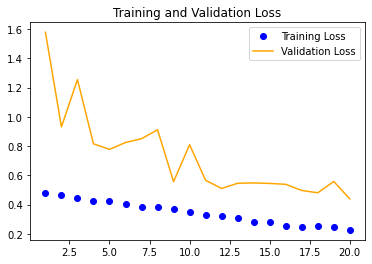

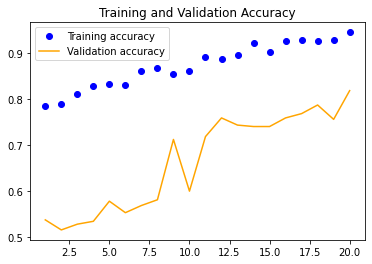

In [ ]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

# Predict and Evaluate

In [ ]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [ ]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.6683868501529052
AP Score: 0.6807360897124131

              precision    recall  f1-score   support

           0       0.63      0.47      0.54        96
           1       0.62      0.76      0.68       109

    accuracy                           0.62       205
   macro avg       0.63      0.62      0.61       205
weighted avg       0.63      0.62      0.62       205

